In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

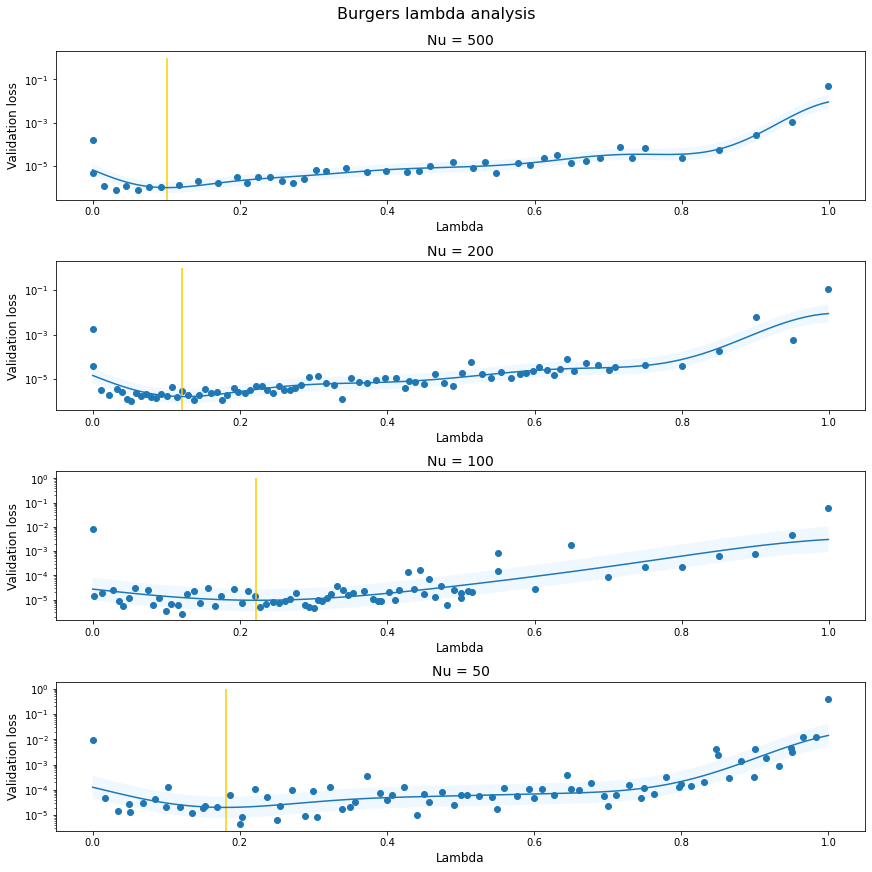

In [205]:
def plot(ax, df, title):
    x = df['alpha'].to_numpy().reshape(-1,1)
    y = df['Data loss lowest (validation)'].to_numpy()
    
    ax.set_title(title, fontsize=14)
    ax.set_yscale('log')
    ax.set_xlabel('Lambda', fontsize=12)
    ax.set_ylabel('Validation loss', fontsize=12)
    
    #z = np.poly1d(np.polyfit(x, np.log(y), 4))
    #xhat = np.linspace(np.min(x), np.max(x), 100)
    #ax.plot(xhat, np.exp(z(xhat)))
    
    kernel = RBF(1.0) + WhiteKernel(1.0, (1e-12,1e3))
    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    bias = np.mean(np.log(y))
    model.fit(x, np.log(y)-bias)
    
    xhat = np.linspace(np.min(x), np.max(x), 100).reshape(-1,1)
    yhat = model.predict(xhat, return_std=True)
    ax.plot(xhat, np.exp(yhat[0]+bias))
    ax.fill_between(xhat[:,0], np.exp(yhat[0]-yhat[1]+bias), np.exp(yhat[0]+yhat[1]+bias), facecolor='#F0F8FF')
    
    low = np.argmin(yhat)
    ax.vlines(xhat[low], 0.0, 1.0, color='#FFCC00')
    
    ax.scatter(x, y)

Nu500 = pd.read_csv('burgers_Nu500.csv')[1:]
Nu200 = pd.read_csv('burgers_Nu200.csv')[1:]
Nu100 = pd.read_csv('burgers_Nu100.csv')[1:]
Nu50 = pd.read_csv('burgers_Nu50.csv')

fig, ax = plt.subplots(4,1, figsize=(12,12), constrained_layout=True, squeeze=False, facecolor='white')
fig.suptitle('Burgers weight analysis', fontsize=16)
plot(ax[0,0], Nu500, 'Nu = 500')
plot(ax[1,0], Nu200, 'Nu = 200')
plot(ax[2,0], Nu100, 'Nu = 100')
plot(ax[3,0], Nu50, 'Nu = 50')

0.0032947656419127645 0.003533836253821673
3.4854283130648e-05 0.00014197749881609688


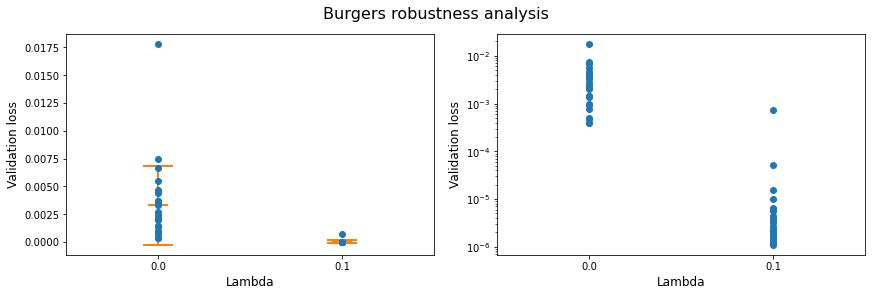

In [196]:
df = pd.read_csv('burgers_robustness.csv')

fig, ax = plt.subplots(1,2, figsize=(12,4), constrained_layout=True, facecolor='white')
fig.suptitle('Burgers robustness analysis', fontsize=16)

ax[0].set_xlabel('Lambda', fontsize=12)
ax[0].set_ylabel('Validation loss', fontsize=12)
ax[0].set_xticks([0, 0.1])
ax[0].set_xlim(-0.05, 0.15)

x = df['alpha'].to_numpy()
y = df['Data loss lowest (validation)'].to_numpy()
ax[0].errorbar(0.0, np.mean(y[x == 0.0]), np.std(y[x == 0.0]), fmt='_--', elinewidth=2, capsize=15, ecolor='tab:orange', c='tab:orange', markeredgewidth=2, ms=20)
ax[0].errorbar(0.1, np.mean(y[x == 0.1]), np.std(y[x == 0.1]), fmt='_--', elinewidth=2, capsize=15, ecolor='tab:orange', c='tab:orange', markeredgewidth=2, ms=20)
ax[0].scatter(x, y, zorder=100)

ax[1].set_yscale('log')
ax[1].set_xlabel('Lambda', fontsize=12)
ax[1].set_ylabel('Validation loss', fontsize=12)
ax[1].set_xticks([0, 0.1])
ax[1].set_xlim(-0.05, 0.15)

x = df['alpha'].to_numpy()
y = df['Data loss lowest (validation)'].to_numpy()
ax[1].scatter(x, y, zorder=100)

print(np.mean(y[x == 0.0]), np.std(y[x == 0.0]))
print(np.mean(y[x == 0.1]), np.std(y[x == 0.1]))

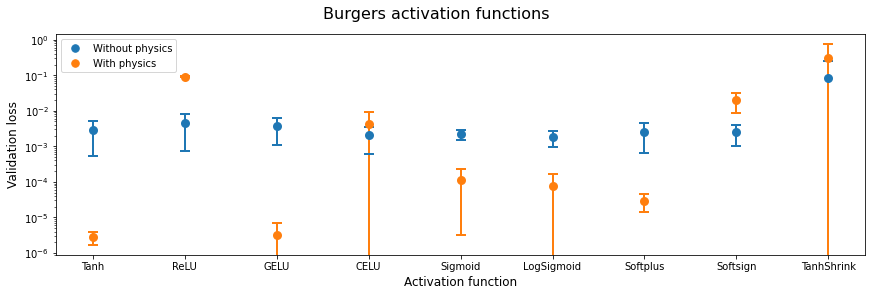

In [37]:
df = pd.read_csv('burgers_funcs.csv')

fig, ax = plt.subplots(1,1, figsize=(12,4), constrained_layout=True, facecolor='white')
fig.suptitle('Burgers activation functions', fontsize=16)

ax.set_yscale('log')
ax.set_xlabel('Activation function', fontsize=12)
ax.set_ylabel('Validation loss', fontsize=12)
for func in ['Tanh', 'ReLU', 'GELU', 'CELU', 'Sigmoid', 'LogSigmoid', 'Softplus', 'Softsign', 'TanhShrink']:
    y1 = df[(df['func'] == func.lower()) & (df['alpha'] == 0.0)]['Data loss lowest (validation)']
    y2 = df[(df['func'] == func.lower()) & (df['alpha'] == 0.1)]['Data loss lowest (validation)']
    ax.errorbar([func], y1.mean(), y1.std(), fmt='o--', elinewidth=2, capsize=5, markeredgewidth=2, ms=7, ecolor='tab:blue', c='tab:blue')
    ax.errorbar([func], y2.mean(), y2.std(), fmt='o--', elinewidth=2, capsize=5, markeredgewidth=2, ms=7, ecolor='tab:orange', c='tab:orange')

legends = []
legends.append(plt.Line2D([0], [0], ls='', color='tab:blue', marker='.', ms=15, label='Without physics'))
legends.append(plt.Line2D([0], [0], ls='', color='tab:orange', marker='.', ms=15, label='With physics'))
ax.legend(handles=legends)